# Government Dataset
### Aim:
Perform the data cleaning and integration operations with visuals and insights

- Practice opening and inspecting the contents of CSVs using pandas dataframes
- descriptive structure of the data
- Practice identify, Summarize and handling missing/invalid/irrelevant data values
- Identify Outliers and smoothing
  - Box plot
  - Violin plot
- Remove empty rows and duplicated data
- Change text case and date formatting
- Practice cleaning text data by removing whitespace and fixing typos
- Trim whitespaces from data
- Use Flash Fill and functions to clean data
- Subsetting Data
- Practice joining multiple dataframes
- Export the cleaned dataset
- Study the relationship between the features of the dataset
  - Statistics based
  - Heatmap
  - Line graph
- Practice the correlation/collinearity/causality analysis using suitable technique and
claim the insight
  - Scatter Diagram
  - Bubble chart
  - Correlation map
  - Statistics based
Pie chart, Histogram, Bar chart, word cloud wherever suitable

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
non_drop_rates = pd.read_csv('drive/My Drive/Abhinav Project/DOR.csv')
crimes = pd.read_csv('drive/My Drive/Abhinav Project/juvinile2015.csv')

In [ ]:
non_drop_rates.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [ ]:
non_drop_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             110 non-null    object
 1   year                 110 non-null    object
 2   Primary_Boys         110 non-null    object
 3   Primary_Girls        110 non-null    object
 4   Primary_Total        110 non-null    object
 5   Upper Primary_Boys   110 non-null    object
 6   Upper Primary_Girls  110 non-null    object
 7   Upper Primary_Total  110 non-null    object
 8   Secondary _Boys      110 non-null    object
 9   Secondary _Girls     110 non-null    object
 10  Secondary _Total     110 non-null    object
 11  HrSecondary_Boys     110 non-null    object
 12  HrSecondary_Girls    110 non-null    object
 13  HrSecondary_Total    110 non-null    object
dtypes: object(14)
memory usage: 12.2+ KB


In [ ]:
crimes.head()

,Category,State/UT (Col.2),"Arms Act, 1959 (Col.3)","Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)","Gambling Act, 1867 (Col.5)","Excise Act, 1944 (Col.6)",Prohibition Act (Col.7),"Explosives & Explosive Substances Act, 1884 & 1908 (Col.8)","Immoral Traffic (Prevention) Act, 1956 - Immoral Traffic (Prevention) Act (Total) (Col.9)","Immoral Traffic (Prevention) Act, 1956 - Under Section 5 (Col.10)",...,"Anti Hijacking Act, 1982 (Col.63)","Atomic Energy Act, 1962 (Col.64)","Weapons of Mass Destruction And Their Delivery Systems (Prohibition Of Unlawful Activities) Act, 2005 (Col.65)","Suppression of Unlawful Acts Against Safety Of Civil Aviation Act, 1982 (Col.66)","Safety of Maritime Navigation Act, 2002 (Col.67)","The Employment of Manual Scavengers And Construction Of Dry Latrines (Prohibition) Act, 1993 (Col.68)","Pre-Natal Diagnostic Techniques (Regulation And Prevention of Misuse) Act, 1994 (Col.69)","The Maritime Zones of India (Regulation of Fishing by Foreign Vessels) Act, 1981 (Col.70)",Other SLL Crimes (Col.71),Total Cognizable SLL Crimes (Col.72)
0,State,Andhra Pradesh,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,13
1,State,Arunachal Pradesh,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,State,Assam,6,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,44
3,State,Bihar,46,4,35,6,0,0,0,0,...,0,0,0,0,0,0,0,0,5,96
4,State,Chhattisgarh,4,3,41,25,0,0,0,0,...,0,0,0,0,0,0,0,0,15,126


In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 72 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   Category                                                                                                                                    39 non-null     object
 1   State/UT (Col.2)                                                                                                                            39 non-null     object
 2   Arms Act, 1959 (Col.3)                                                                                                                      39 non-null     int64 
 3   Narcotic Drugs & Psychotropic Substances Act, 1985 (

identifying outliers and smoothing

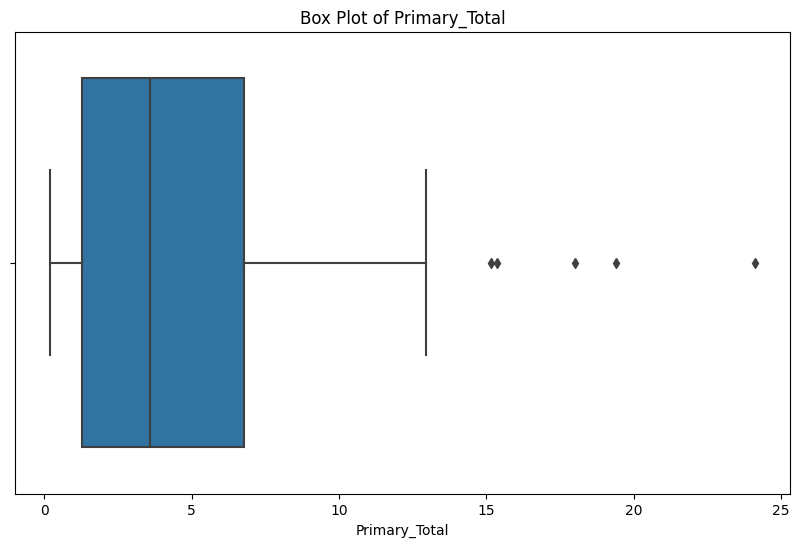

In [ ]:
non_drop_rates['Primary_Total'] = pd.to_numeric(non_drop_rates['Primary_Total'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary_Total', data=non_drop_rates)
plt.title('Box Plot of Primary_Total')
plt.xlabel('Primary_Total')
plt.show()

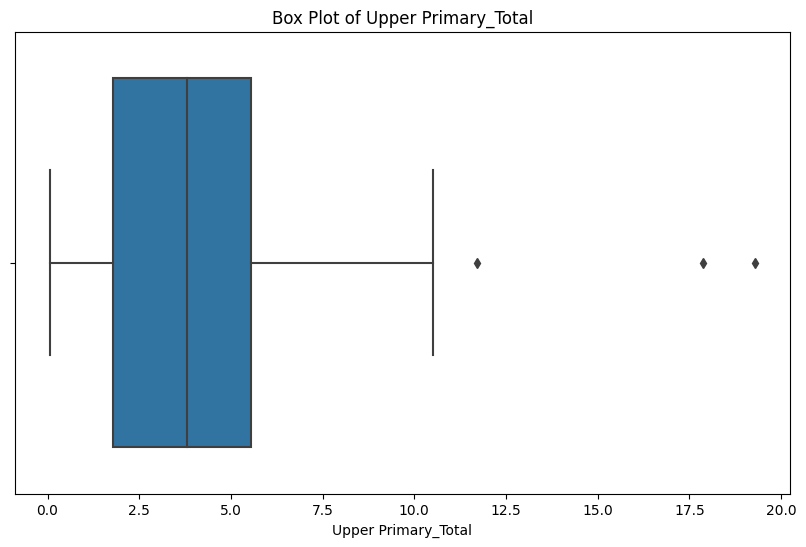

In [ ]:
non_drop_rates['Upper Primary_Total'] = pd.to_numeric(non_drop_rates['Upper Primary_Total'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Upper Primary_Total', data=non_drop_rates)
plt.title('Box Plot of Upper Primary_Total')
plt.xlabel('Upper Primary_Total')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


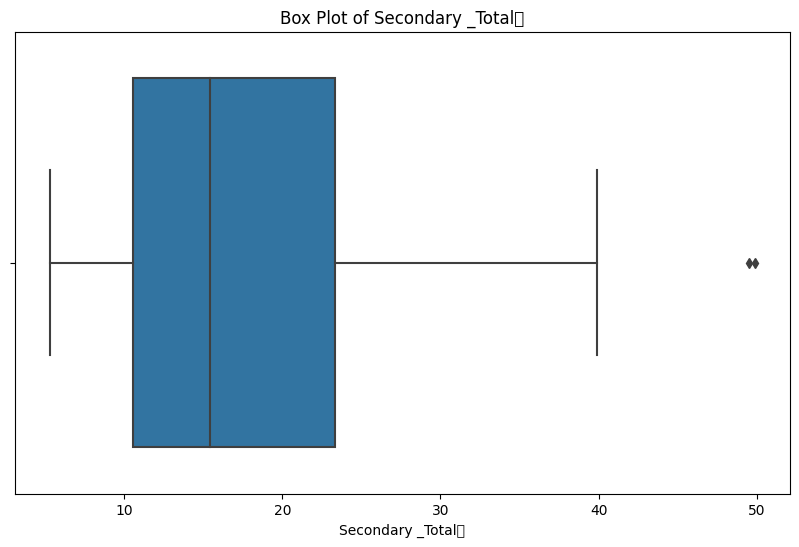

In [ ]:
non_drop_rates['Secondary _Total'] = pd.to_numeric(non_drop_rates['Secondary _Total'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Secondary _Total', data=non_drop_rates)
plt.title('Box Plot of Secondary _Total	')
plt.xlabel('Secondary _Total	')
plt.show()

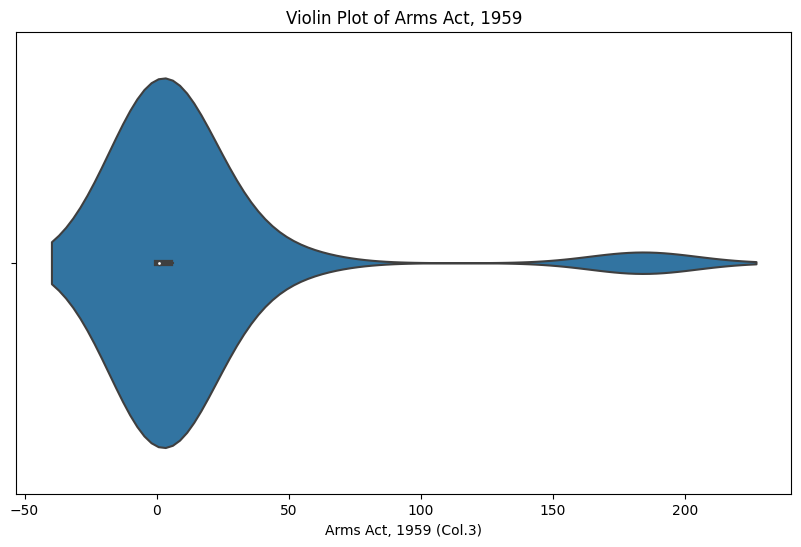

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Arms Act, 1959 (Col.3)', data=crimes)
plt.title('Violin Plot of Arms Act, 1959')
plt.xlabel('Arms Act, 1959 (Col.3)')
plt.show()

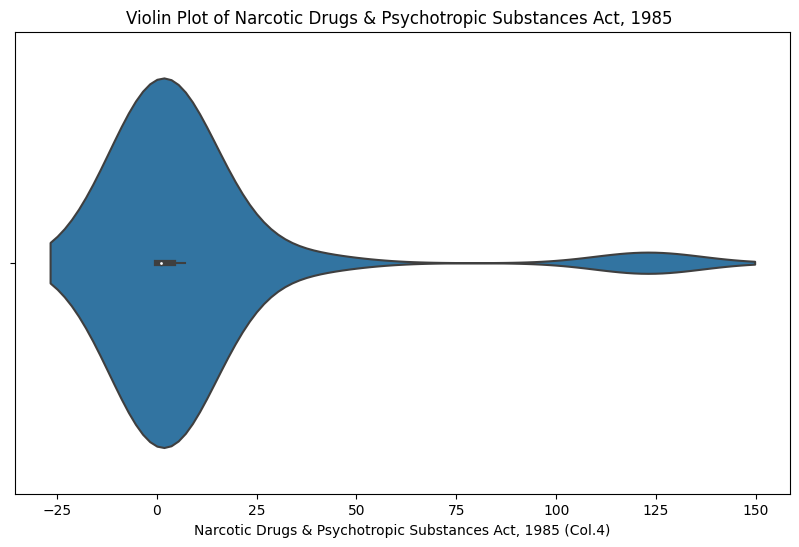

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)', data=crimes)
plt.title('Violin Plot of Narcotic Drugs & Psychotropic Substances Act, 1985 ')
plt.xlabel('Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)')
plt.show()

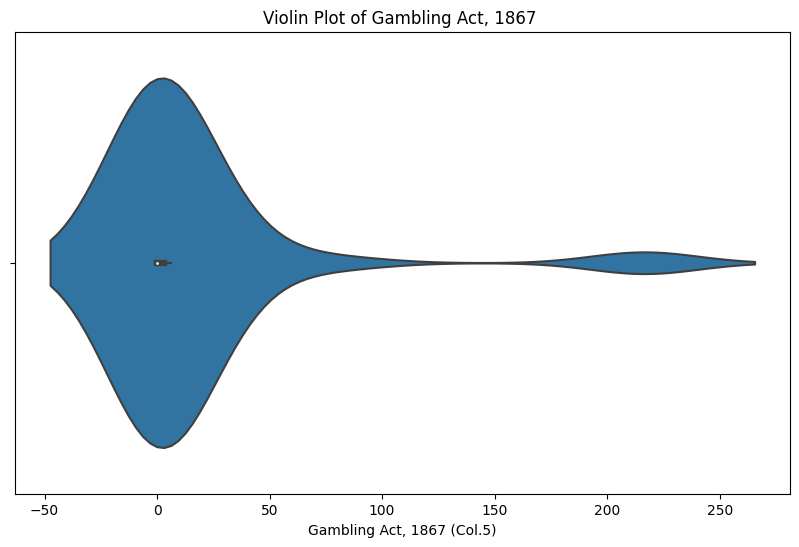

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gambling Act, 1867 (Col.5)', data=crimes)
plt.title('Violin Plot of Gambling Act, 1867 ')
plt.xlabel('Gambling Act, 1867 (Col.5)')
plt.show()

trim the whitespaces

In [ ]:
import pandas as pd

for column in crimes.columns:
    if crimes[column].dtype == 'object':
        crimes[column] = crimes[column].str.strip()

crimes.head()


,Category,State/UT (Col.2),"Arms Act, 1959 (Col.3)","Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)","Gambling Act, 1867 (Col.5)","Excise Act, 1944 (Col.6)",Prohibition Act (Col.7),"Explosives & Explosive Substances Act, 1884 & 1908 (Col.8)","Immoral Traffic (Prevention) Act, 1956 - Immoral Traffic (Prevention) Act (Total) (Col.9)","Immoral Traffic (Prevention) Act, 1956 - Under Section 5 (Col.10)",...,"Anti Hijacking Act, 1982 (Col.63)","Atomic Energy Act, 1962 (Col.64)","Weapons of Mass Destruction And Their Delivery Systems (Prohibition Of Unlawful Activities) Act, 2005 (Col.65)","Suppression of Unlawful Acts Against Safety Of Civil Aviation Act, 1982 (Col.66)","Safety of Maritime Navigation Act, 2002 (Col.67)","The Employment of Manual Scavengers And Construction Of Dry Latrines (Prohibition) Act, 1993 (Col.68)","Pre-Natal Diagnostic Techniques (Regulation And Prevention of Misuse) Act, 1994 (Col.69)","The Maritime Zones of India (Regulation of Fishing by Foreign Vessels) Act, 1981 (Col.70)",Other SLL Crimes (Col.71),Total Cognizable SLL Crimes (Col.72)
0,State,Andhra Pradesh,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,13
1,State,Arunachal Pradesh,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,State,Assam,6,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,44
3,State,Bihar,46,4,35,6,0,0,0,0,...,0,0,0,0,0,0,0,0,5,96
4,State,Chhattisgarh,4,3,41,25,0,0,0,0,...,0,0,0,0,0,0,0,0,15,126


In [ ]:
import pandas as pd

for column in non_drop_rates.columns:
    if non_drop_rates[column].dtype == 'object':
        non_drop_rates[column] = non_drop_rates[column].str.strip()

non_drop_rates.head()


,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [ ]:
import pandas as pd

selected_columns1 = ['Arms Act, 1959 (Col.3)', 'Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)', 'Gambling Act, 1867 (Col.5)','Other SLL Crimes (Col.71)']

statistics1 = crimes[selected_columns1].describe()
statistics1


,"Arms Act, 1959 (Col.3)","Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)","Gambling Act, 1867 (Col.5)",Other SLL Crimes (Col.71)
count,39.000000,39.000000,39.000000,39.000000
mean,14.384615,9.461538,16.769231,37.846154
std,41.433279,27.758210,49.459426,109.948921
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000
75%,5.000000,4.000000,3.000000,11.000000
max,187.000000,123.000000,218.000000,492.000000


In [ ]:
selected_columns2 = ['Secondary _Total', 'Upper Primary_Total','HrSecondary_Total', 'Primary_Total']

In [ ]:
import pandas as pd

statistics2 = non_drop_rates[selected_columns2].describe()
statistics2


,Secondary _Total,Upper Primary_Total,Primary_Total
count,106.000000,101.000000,93.000000
mean,17.393868,4.181089,4.908602
std,8.609419,3.285638,4.617200
min,5.320000,0.070000,0.200000
25%,10.587500,1.790000,1.290000
50%,15.445000,3.800000,3.580000
75%,23.345000,5.550000,6.790000
max,49.860000,19.280000,24.110000


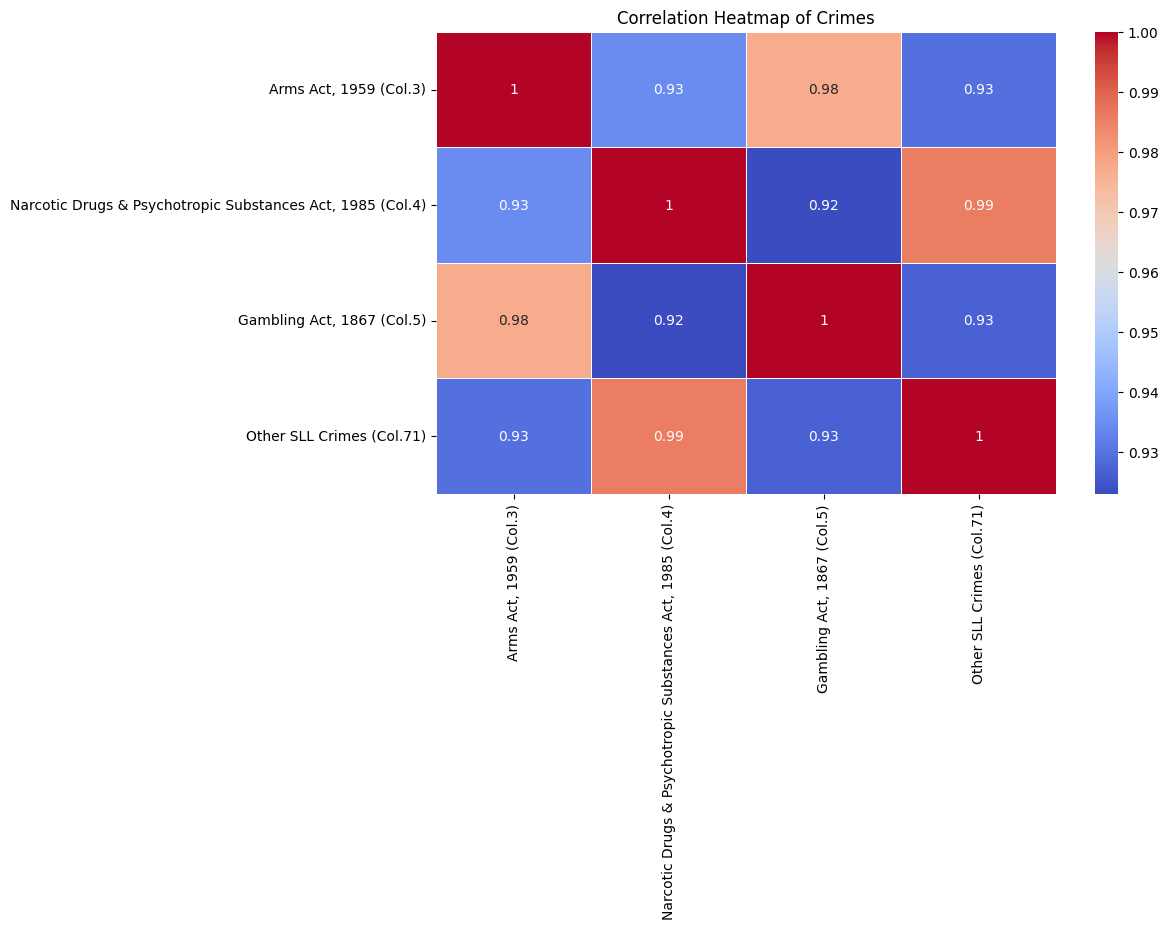

In [ ]:
correlation_matrix1 = crimes[selected_columns1].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Crimes')
plt.show()

<ipython-input-107-5504b20a80d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = non_drop_rates[selected_columns2].corr()


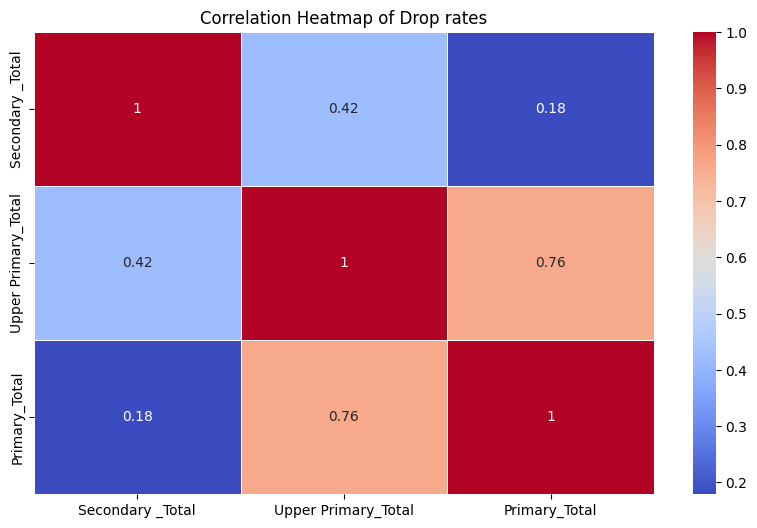

In [ ]:
correlation_matrix2 = non_drop_rates[selected_columns2].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Drop rates')
plt.show()

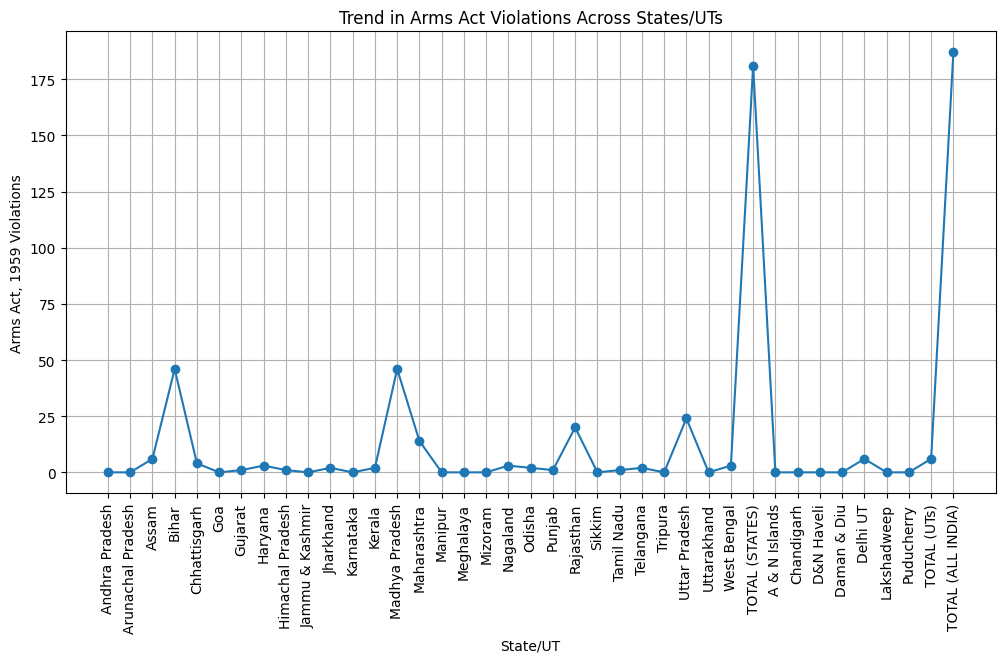

In [ ]:
states = crimes['State/UT (Col.2)']
arms_act_violations = crimes['Arms Act, 1959 (Col.3)']

plt.figure(figsize=(12, 6))
plt.plot(states, arms_act_violations, marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Arms Act, 1959 Violations')
plt.title('Trend in Arms Act Violations Across States/UTs')
plt.grid(True)
plt.show()

arms act is mostly seen in Bihar and MP

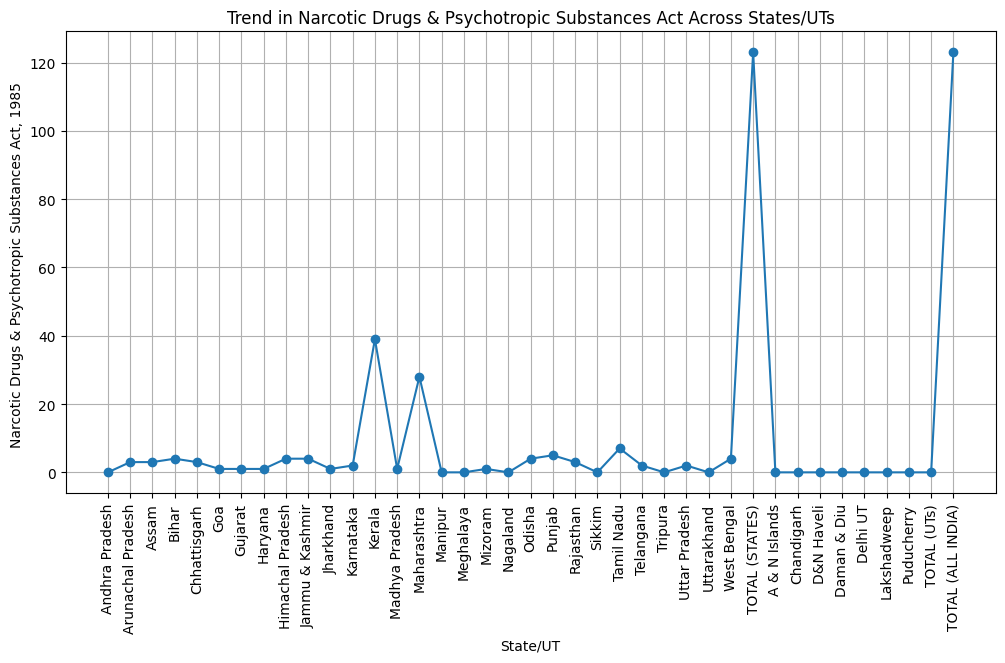

In [ ]:
states = crimes['State/UT (Col.2)']
arms_act_violations = crimes['Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)']

plt.figure(figsize=(12, 6))
plt.plot(states, arms_act_violations, marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Narcotic Drugs & Psychotropic Substances Act, 1985 ')
plt.title('Trend in Narcotic Drugs & Psychotropic Substances Act Across States/UTs')
plt.grid(True)
plt.show()

narcotic crimes are moslty seen in Kerela ans Maharashtra

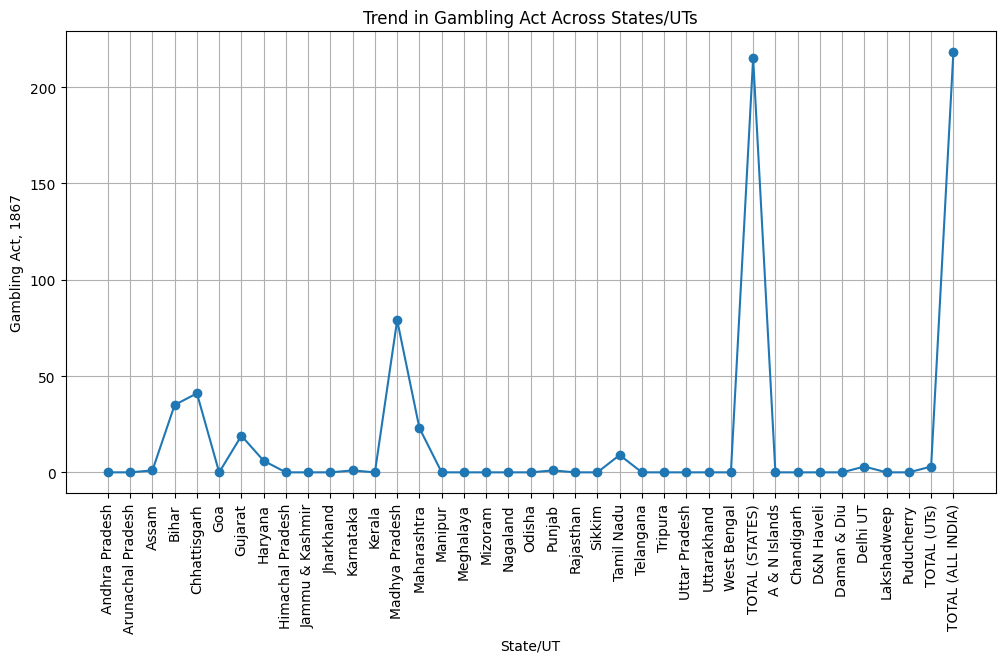

In [ ]:
states = crimes['State/UT (Col.2)']
arms_act_violations = crimes['Gambling Act, 1867 (Col.5)']


plt.figure(figsize=(12, 6))
plt.plot(states, arms_act_violations, marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Gambling Act, 1867')
plt.title('Trend in Gambling Act Across States/UTs')
plt.grid(True)
plt.show()

Gambling crimes are seen majorly in MP

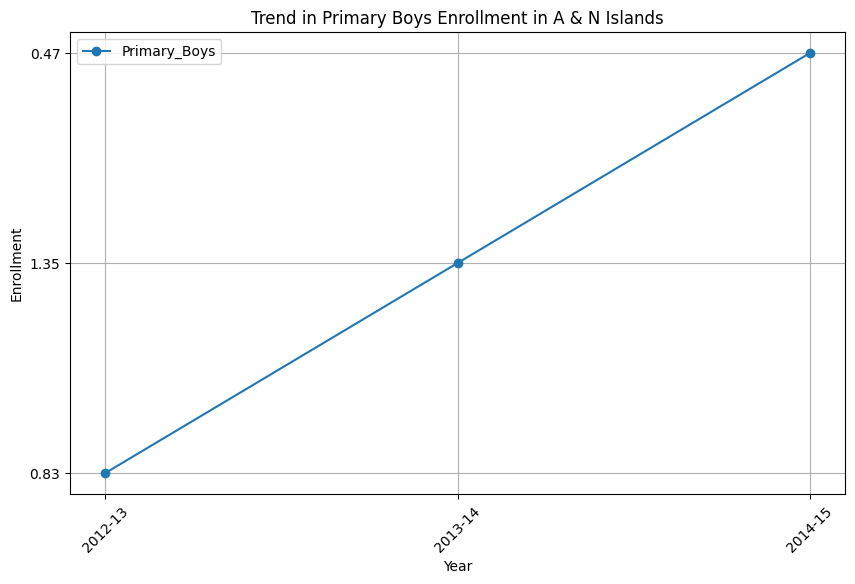

In [ ]:
an_islands_data = non_drop_rates[non_drop_rates['State_UT'] == 'A & N Islands']

plt.figure(figsize=(10, 6))
plt.plot(an_islands_data['year'], an_islands_data['Primary_Boys'], marker='o', linestyle='-', label='Primary_Boys')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.title('Trend in Primary Boys Enrollment in A & N Islands')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

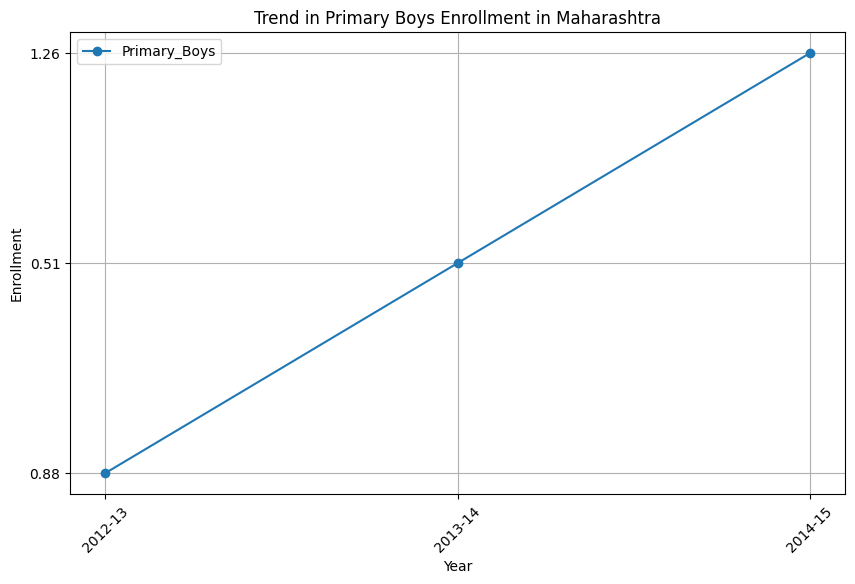

In [ ]:
an_islands_data = drop_rates[drop_rates['State_UT'] == 'Maharashtra']

plt.figure(figsize=(10, 6))
plt.plot(an_islands_data['year'], an_islands_data['Primary_Boys'], marker='o', linestyle='-', label='Primary_Boys')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.title('Trend in Primary Boys Enrollment in Maharashtra')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

non droping rates are increasing over the years in both A&N islands and Maharashtra

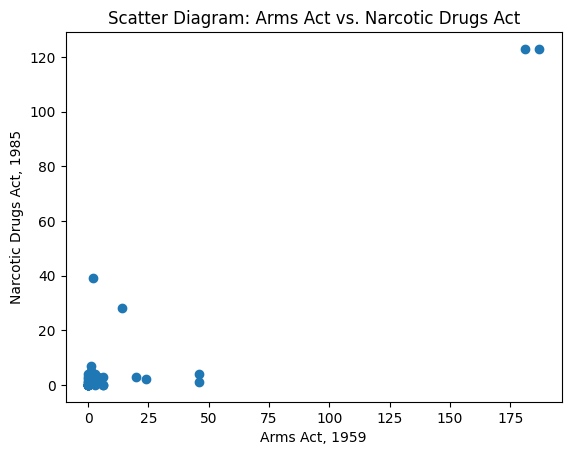

In [ ]:
x = crimes['Arms Act, 1959 (Col.3)']
y = crimes['Narcotic Drugs & Psychotropic Substances Act, 1985 (Col.4)']

plt.scatter(x, y)
plt.xlabel('Arms Act, 1959')
plt.ylabel('Narcotic Drugs Act, 1985')
plt.title('Scatter Diagram: Arms Act vs. Narcotic Drugs Act')
plt.show()

In [ ]:
non_drop_rates=non_drop_rates.dropna()

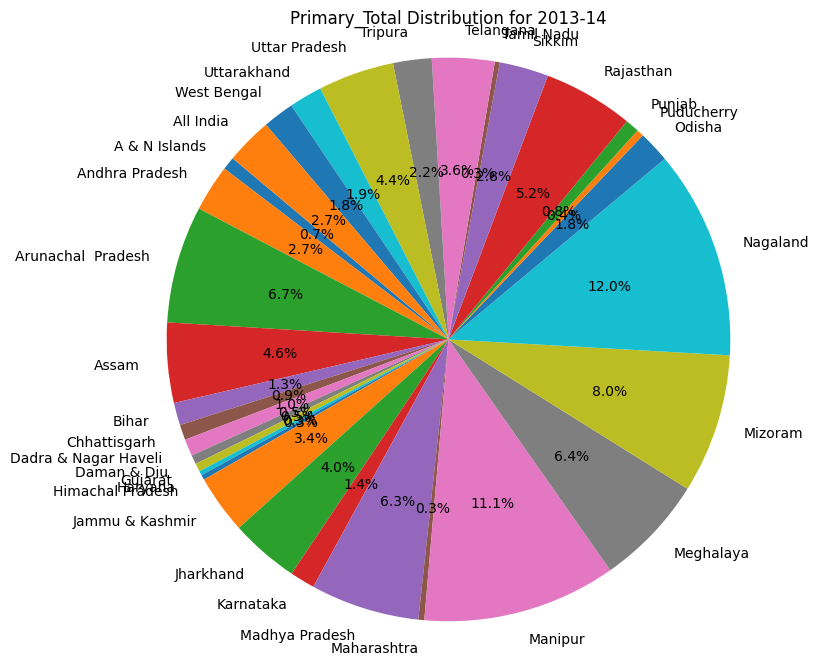

In [ ]:
year = "2013-14"
year_data = non_drop_rates[non_drop_rates['year'] == year]

state_ut_names = year_data['State_UT']
primary_total_values = year_data['Primary_Total']

plt.figure(figsize=(8, 8))
plt.pie(primary_total_values, labels=state_ut_names, autopct='%1.1f%%', startangle=140)
plt.title(f'Primary_Total Distribution for {year}')
plt.axis('equal')
plt.show()

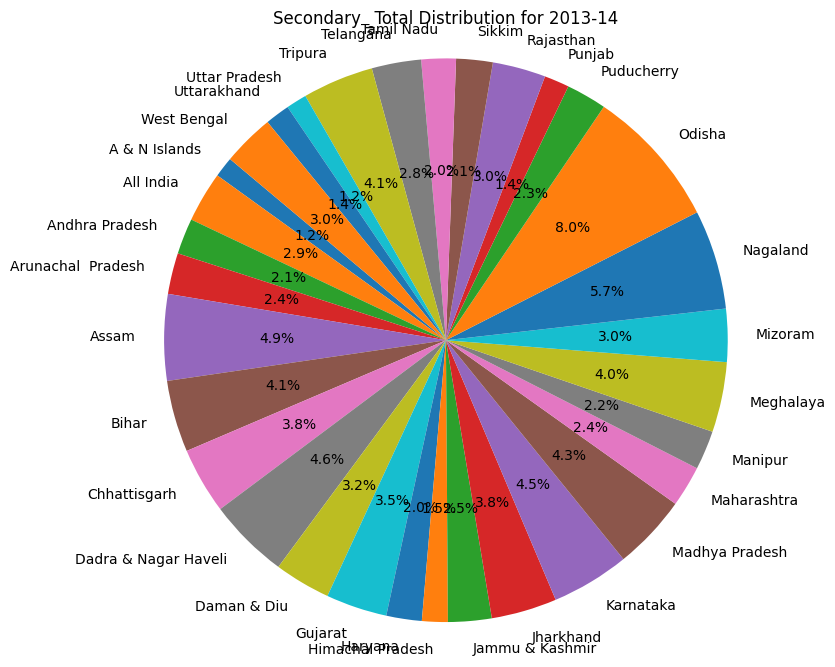

In [ ]:
year = "2013-14"

year_data = non_drop_rates[non_drop_rates['year'] == year]

variable_to_visualize = "Secondary _Total"

data_grouped = year_data.groupby('State_UT')[variable_to_visualize].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(data_grouped[variable_to_visualize], labels=data_grouped['State_UT'], autopct='%1.1f%%', startangle=140)
plt.title(f'{variable_to_visualize} Distribution for {year}')
plt.axis('equal')

plt.show()

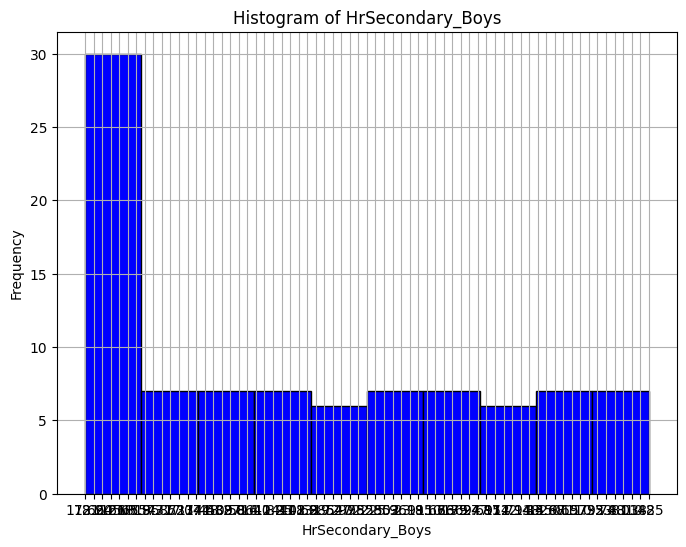

In [ ]:
variable_to_plot = "HrSecondary_Boys"

plt.figure(figsize=(8, 6))
plt.hist(non_drop_rates[variable_to_plot], bins=10, color='blue', edgecolor='black')
plt.xlabel(variable_to_plot)
plt.ylabel("Frequency")
plt.title(f'Histogram of {variable_to_plot}')
plt.grid(True)

plt.show()

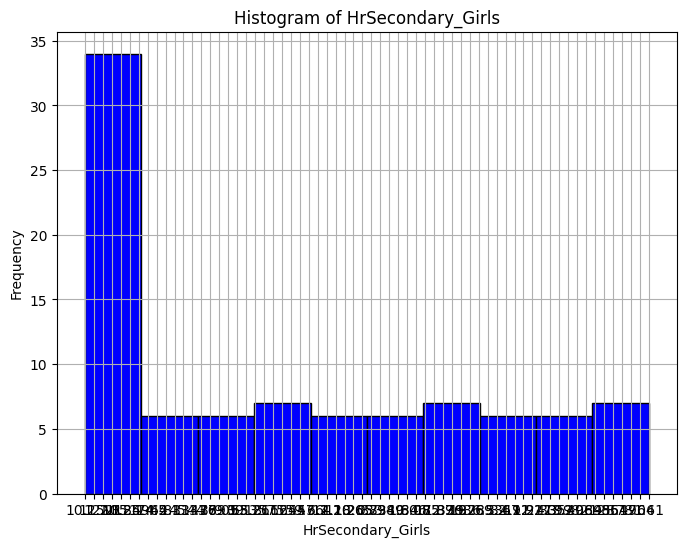

In [ ]:
variable_to_plot = "HrSecondary_Girls"

plt.figure(figsize=(8, 6))
plt.hist(non_drop_rates[variable_to_plot], bins=10, color='blue', edgecolor='black')
plt.xlabel(variable_to_plot)
plt.ylabel("Frequency")
plt.title(f'Histogram of {variable_to_plot}')
plt.grid(True)

plt.show()

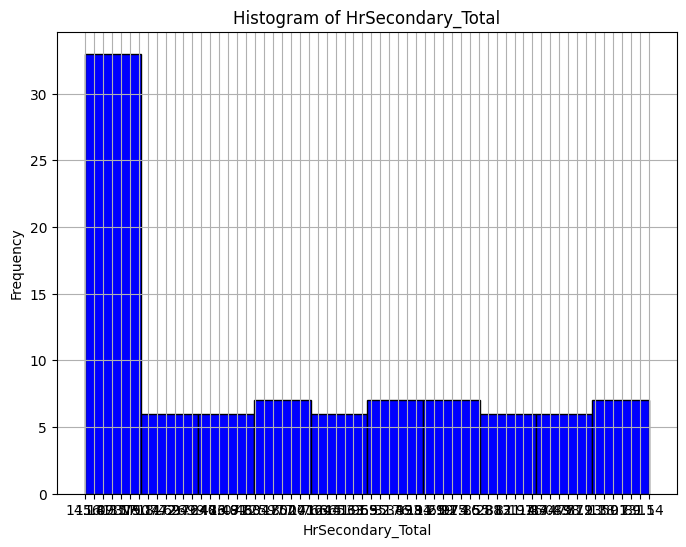

In [ ]:
variable_to_plot = "HrSecondary_Total"

plt.figure(figsize=(8, 6))
plt.hist(non_drop_rates[variable_to_plot], bins=10, color='blue', edgecolor='black')
plt.xlabel(variable_to_plot)
plt.ylabel("Frequency")
plt.title(f'Histogram of {variable_to_plot}')
plt.grid(True)

plt.show()

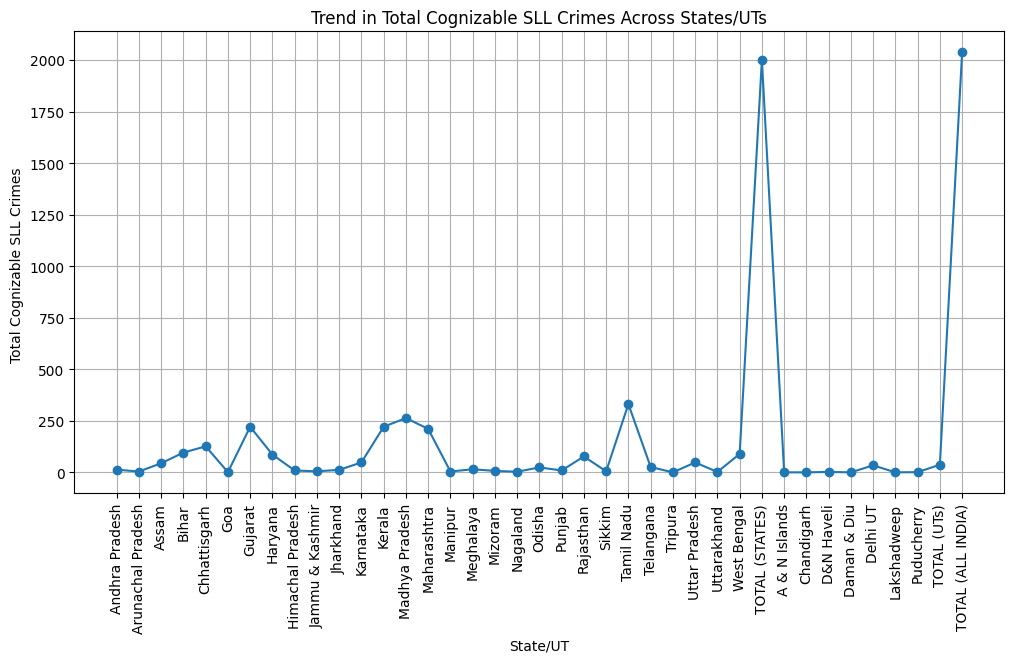

In [ ]:
states = crimes['State/UT (Col.2)']
Total_Cognizable_SLL_Crimes = crimes['Total Cognizable SLL Crimes (Col.72)']


plt.figure(figsize=(12, 6))
plt.plot(states, Total_Cognizable_SLL_Crimes, marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Total Cognizable SLL Crimes ')
plt.title('Trend in Total Cognizable SLL Crimes Across States/UTs')
plt.grid(True)
plt.show()

Gujrat , MP and tamilnadu are majorly facing SLL crime acts followed by kerela and maharahstra

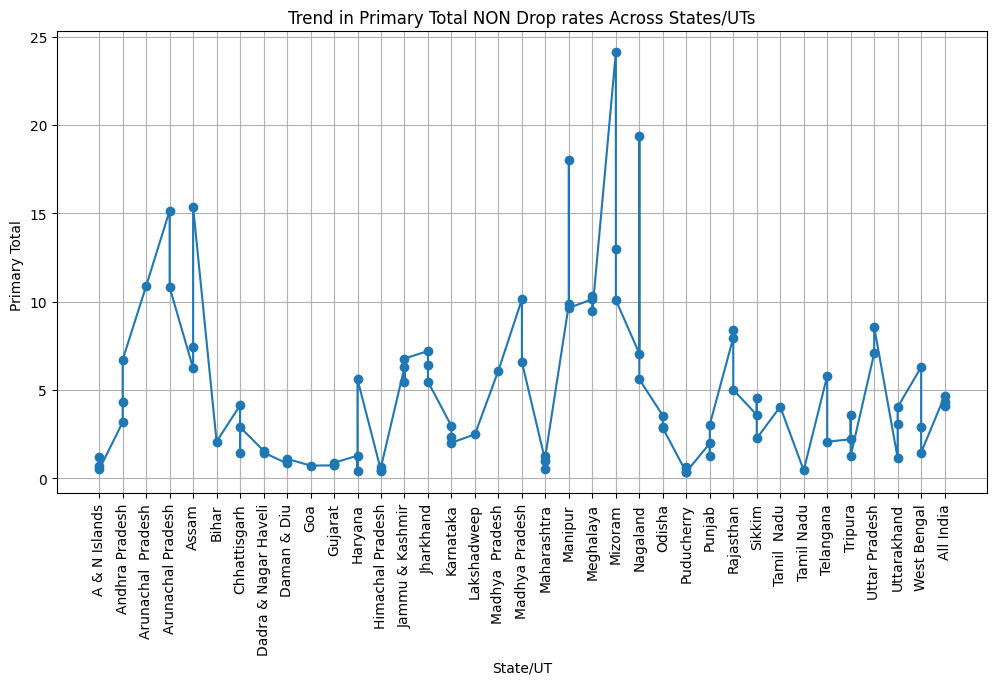

In [ ]:
states = non_drop_rates['State_UT']
Primary = non_drop_rates['Primary_Total']


plt.figure(figsize=(12, 6))
plt.plot(states, Primary, marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Primary Total ')
plt.title('Trend in Primary Total NON Drop rates Across States/UTs')
plt.grid(True)
plt.show()

states like GOa , Gujrat , Maharashtra are facing very less non drop rates i.e higher drop out rates

from above analysis we can say lower the non droping rates or higher the droping rates of students in the state higher will be the crimes



we can conclude from this that less educated children will tend to do crimes